In [1]:
#### import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score
import pandas as pd
import seaborn as sns
%matplotlib inline
def to_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [2]:
oa_table = pd.read_csv('oa2.csv', index_col = 0)
oa_table = oa_table.fillna(0)

In [3]:
def select_the_best(csv_name,min_col = -1):  # select the best wapls compones
    css = pd.DataFrame(np.zeros([1,5]))
    try:
        sub_pd = pd.read_csv(csv_name,index_col = 0).dropna(axis = 0)
    except:
        sub_pd = csv_name
    for _ in range(5):
        css.iloc[0, _] = to_rmse(sub_pd.iloc[:,_],sub_pd.iloc[:,-1])
    css.columns = sub_pd.columns[:5]
    css_i = (css.iloc[:,1:].values-css.iloc[:,:-1].values)/css.iloc[:,:-1].values
    print(css_i)
    dela = np.arange(4)[(css_i>-0.05)[0]][0]
    print(dela)

    if np.isnan(dela):
        dela = 0
    if min_col <0:
        min_col = css.columns[dela]
    else:
        min_col = css.columns[min_col]
    print(min_col )
    sub_col = sub_pd[min_col]
    min_col_ix = np.array(range(6))[sub_pd.columns == min_col][0]
    return([sub_col,min_col,min_col_ix])

In [4]:
import glob
dirtxt2 = []
jpg_dir1 = 'results2007 - Copy - Copy/'     # ## BASED ON CLEARED RECONSTRUCTION RESULT       
for i in glob.glob(jpg_dir1+ r'/*.csv'):  
    print(str(i).replace("\\", "/"))
    dirtxt2.append(str(i).replace("\\", "/"))
led_names = ['MEM_base','MEM_emb','MEM_comb','WA_inv','WA_PLS(best)']


results2007 - Copy - Copy/consielo.csv
results2007 - Copy - Copy/lla.csv
results2007 - Copy - Copy/RLGH.csv
results2007 - Copy - Copy/RLGH3.csv
results2007 - Copy - Copy/vill.csv
results2007 - Copy - Copy/vill_0609.csv


In [5]:
import glob
dirtxt1 = []
jpg_dir1 = 'validation/'                      
for i in glob.glob(jpg_dir1+ r'/WAPLS*.csv'):  
    print(str(i).replace("\\", "/"))
    dirtxt1.append(str(i).replace("\\", "/"))
def to_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
css = pd.DataFrame(np.zeros([len(dirtxt1),5]))
for i_index,csv_name in enumerate(dirtxt1):
    sub_pd = pd.read_csv(csv_name,index_col = 0).dropna(axis = 0)
    for _ in range(5):
        css.iloc[i_index, _] = to_rmse(sub_pd.iloc[:,_],sub_pd.iloc[:,-1])
css.index =  dirtxt1  
css.columns = sub_pd.columns[:5]
css

validation/WAPLS_MATcv.csv
validation/WAPLS_MTCO_cv.csv
validation/WAPLS_pHcv.csv


Comp01     Comp02     Comp03     Comp04  \
validation/WAPLS_MATcv.csv    31.971090  29.135753  30.224026  31.711685   
validation/WAPLS_MTCO_cv.csv   5.304351   4.963534   4.854218   4.841612   
validation/WAPLS_pHcv.csv      0.306659   0.298560   0.312666   0.325052   

                                 Comp05  
validation/WAPLS_MATcv.csv    33.556549  
validation/WAPLS_MTCO_cv.csv   4.876146  
validation/WAPLS_pHcv.csv      0.343984

results2007 - Copy - Copy/lla.csv
[[-0.0264122   0.04724833  0.03961432  0.05824417]]
0
Comp02


C:\Users\cml\AppData\Local\Temp\ipykernel_17140\3720538723.py:23: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(plt_line.iloc[:,5],'-o',markersize = 4, linestyle='--',alpha = 0.7) # 's',


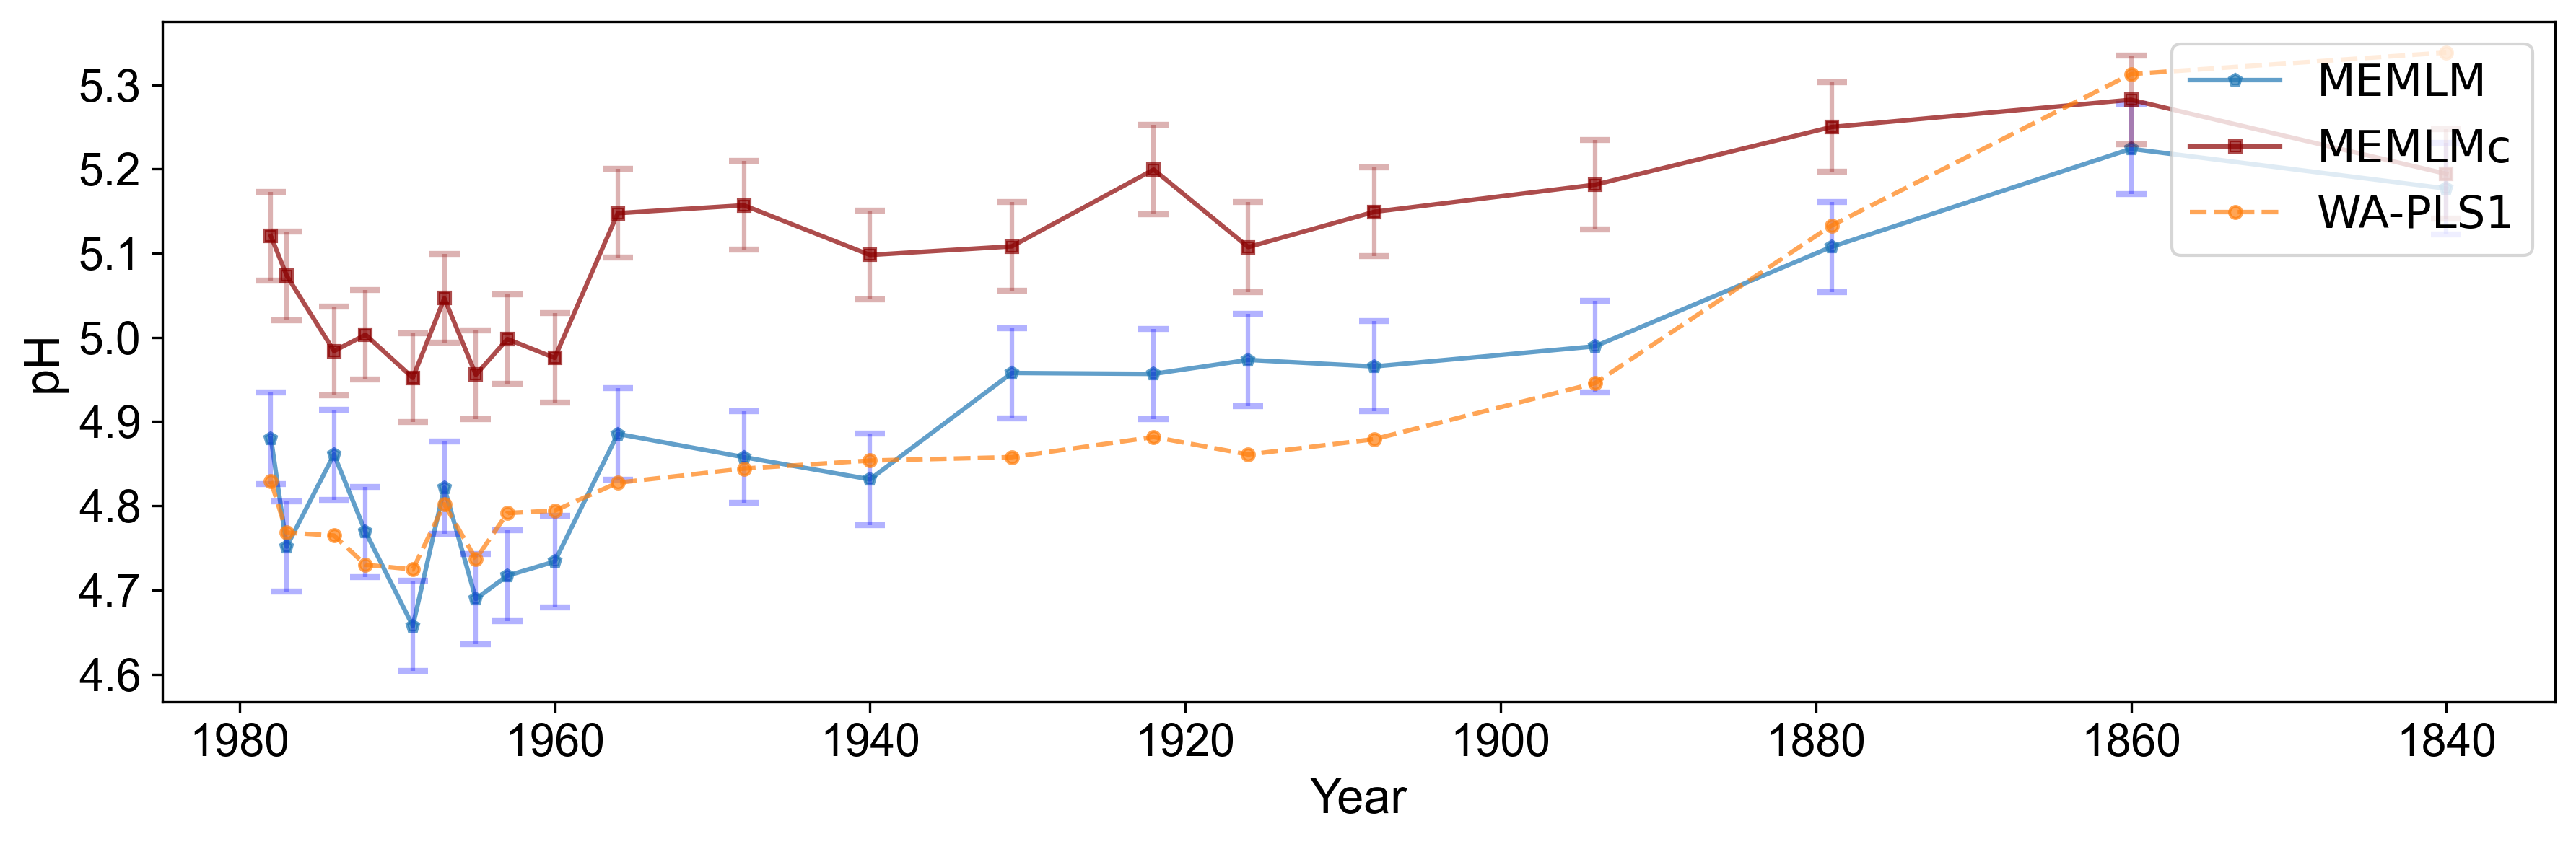

In [12]:
#RLGH

com_num = 4
plt_line = (pd.read_csv(dirtxt2[2],index_col = 0).dropna(axis = 0))
plt_line.index = plt_line.index#-30000

wapls_best = select_the_best('validation/WAPLS_pHcv.csv',1)
plt.figure(figsize=(12,4),dpi = 300)
plt_line.index = 1980-plt_line.index
plt_line = plt_line.iloc[:,[0,1,2,3,4,(5+wapls_best[-1]),-6,-5,-4,-3,-2,-1]]
plt_line.columns = [*plt_line.columns[:-1],'WAPLS_'+str(wapls_best[-1]+1)]
plt.plot(plt_line.iloc[:,0],'-p',markersize = 4,alpha = 0.7)
#plt.plot(plt_line.iloc[:,-6],'-p',markersize = 4,alpha = 0.3)
#plt.plot(plt_line.iloc[:,-5],'-p',markersize = 4,alpha = 0.3)
#plt.plot(plt_line.iloc[:,1],'-p',markersize = 4,alpha = 0.7)
plt.errorbar(plt_line.index, plt_line.iloc[:,0], yerr=plt_line.iloc[:,-6]-plt_line.iloc[:,0], alpha = 0.3,fmt='None', color='blue', capsize=5, capthick=2)
plt.plot(plt_line.iloc[:,2],'-s',markersize = 4,alpha = 0.7,color = 'darkred')
#plt.plot(plt_line.iloc[:,-4],'-s',markersize = 4,alpha = 0.3,color = 'darkred')
#plt.plot(plt_line.iloc[:,-3],'-s',markersize = 4,alpha = 0.3,color = 'darkred')
plt.errorbar(plt_line.index, plt_line.iloc[:,2], yerr=plt_line.iloc[:,-2]-plt_line.iloc[:,2], alpha = 0.3,fmt='None', color = 'darkred',capsize=5, capthick=2)

#plt.plot(plt_line.iloc[:,3],'-s',markersize = 4, linestyle='--',alpha = 1) #'s',
#plt.plot(plt_line.iloc[:,4],'-s',markersize = 4, linestyle='--',alpha = 0.7) # 's',
plt.plot(plt_line.iloc[:,5],'-o',markersize = 4, linestyle='--',alpha = 0.7) # 's',
#plt.plot(plt_line.iloc[:,-2],'-o',markersize = 4, linestyle='--',alpha = 0.3) # 's',
#plt.plot(plt_line.iloc[:,-1],'-o',markersize = 4, linestyle='--',alpha = 0.3) # 's',
#plt.errorbar(plt_line.index, plt_line.iloc[:,5], yerr=plt_line.iloc[:,-2]-plt_line.iloc[:,5], fmt='None', color='black', capsize=5, capthick=2)

led_names = ['MEMLM','MEMLMe','MEMLMc','WAPLS (best)']
led_names = ['MEMLM','MEMLMc','WA-PLS1']

plt.gca().invert_xaxis()
#'-o', '-s', '-^',  '-p',
plt.legend(led_names, loc = 'upper right', fontsize="15")
plt.ylabel('pH', fontdict={'family' : 'Arial', 'size'   : 16})
plt.xlabel('Year', fontdict={'family' : 'Arial', 'size'   : 16})
plt.yticks(fontproperties = 'Arial', size = 15)
plt.xticks(fontproperties = 'Arial', size = 15)
#marker
plt.tight_layout()
#plt.savefig('rlgh_256_2107.png',dpi = 300)
plt.show()

#plt.savefig('rlgh3_2107.png',dpi = 300)
plt.show()
#plt.legend(['MSE_train','MSE_val'])

results2007 - Copy - Copy/RLGH3.csv
[[-0.0264122   0.04724833  0.03961432  0.05824417]]
0
Comp01


C:\Users\cml\AppData\Local\Temp\ipykernel_17140\3762740989.py:23: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(plt_line.iloc[:,5],'-o',markersize = 4, linestyle='--',alpha = 0.7) # 's',


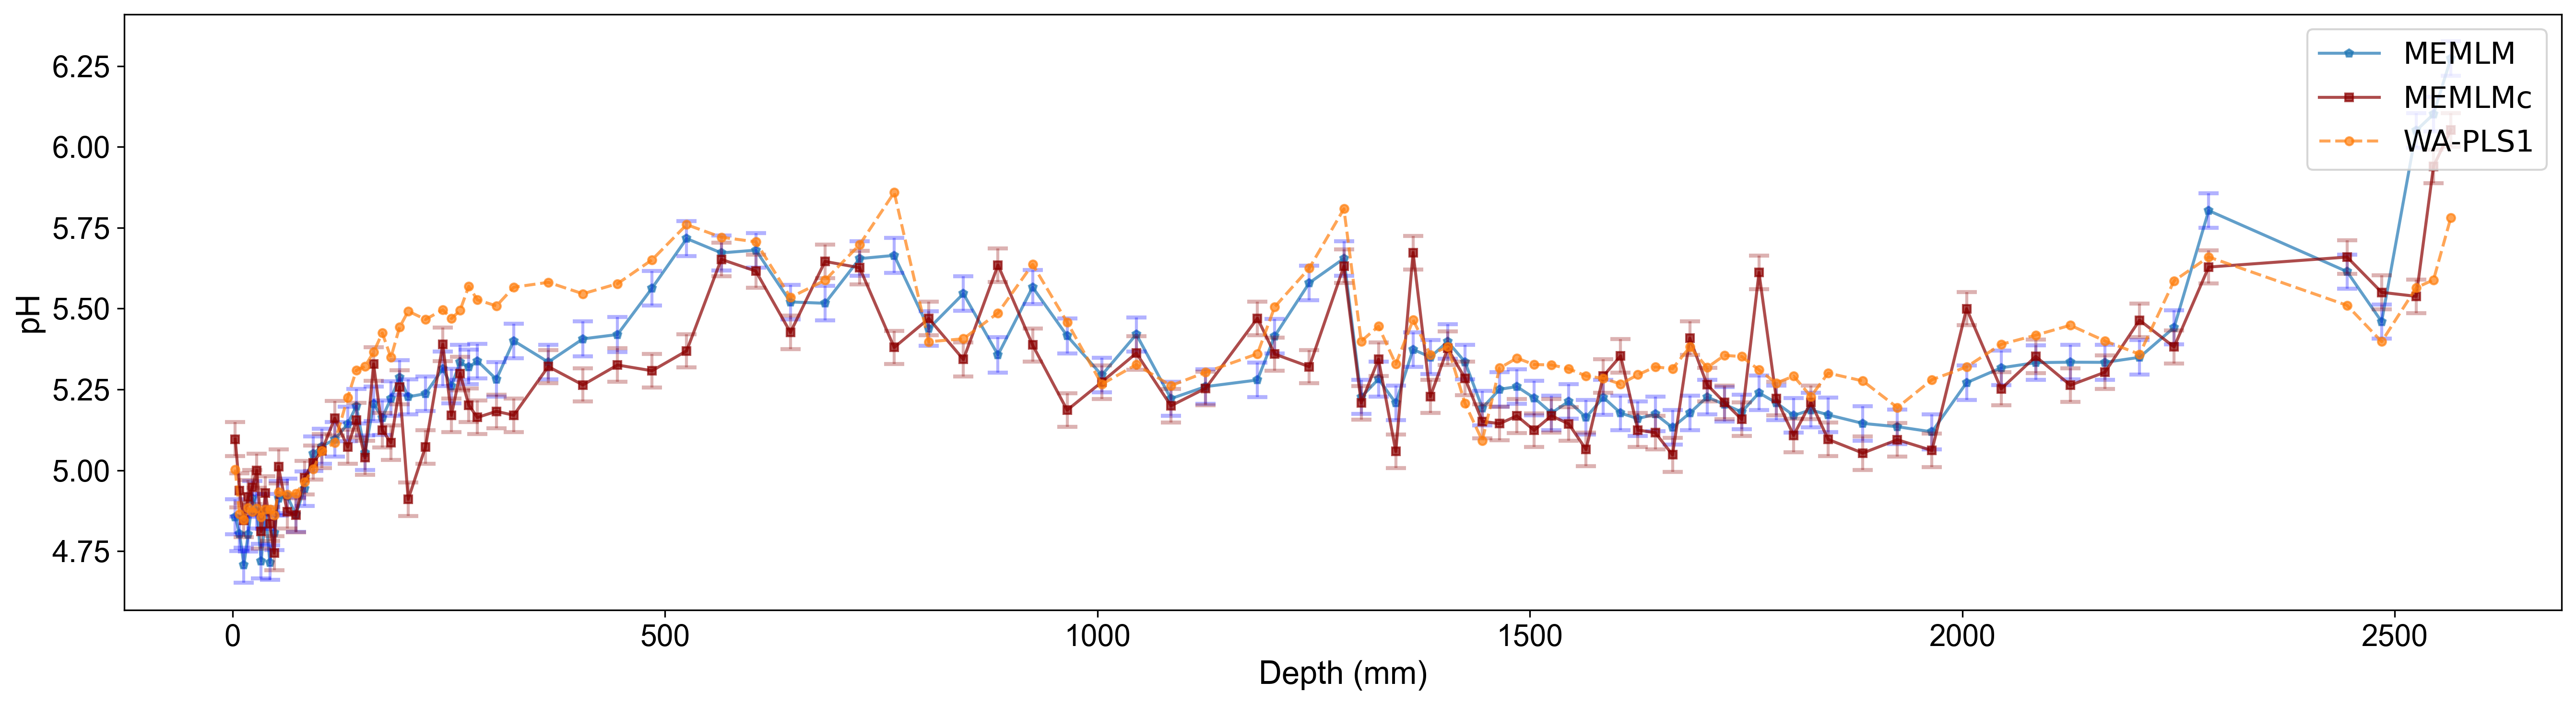

In [13]:
#RLGH3
com_num = 4
plt_line = (pd.read_csv(dirtxt2[3],index_col = 0).dropna(axis = 0))
plt_line.index = plt_line.index-30000

wapls_best = select_the_best('validation/WAPLS_pHcv.csv',0)
plt.figure(figsize=(18,5),dpi = 300)
plt_line = plt_line.iloc[:,[0,1,2,3,4,(5+wapls_best[-1]),-6,-5,-4,-3,-2,-1]]
plt_line.rename(columns={plt_line.columns[5]: 'WAPLS_'+str(wapls_best[-1]+1)}, inplace=True)

plt.plot(plt_line.iloc[:,0],'-p',markersize = 4,alpha = 0.7)
#plt.plot(plt_line.iloc[:,-6],'-p',markersize = 4,alpha = 0.3)
#plt.plot(plt_line.iloc[:,-5],'-p',markersize = 4,alpha = 0.3)
#plt.plot(plt_line.iloc[:,1],'-p',markersize = 4,alpha = 0.7)
plt.errorbar(plt_line.index, plt_line.iloc[:,0], yerr=plt_line.iloc[:,-6]-plt_line.iloc[:,0], alpha = 0.3,fmt='None', color='blue', capsize=5, capthick=2)
plt.plot(plt_line.iloc[:,2],'-s',markersize = 4,alpha = 0.7,color = 'darkred')
#plt.plot(plt_line.iloc[:,-4],'-s',markersize = 4,alpha = 0.3,color = 'darkred')
#plt.plot(plt_line.iloc[:,-3],'-s',markersize = 4,alpha = 0.3,color = 'darkred')
plt.errorbar(plt_line.index, plt_line.iloc[:,2], yerr=plt_line.iloc[:,-2]-plt_line.iloc[:,2], alpha = 0.3,fmt='None', color = 'darkred',capsize=5, capthick=2)

#plt.plot(plt_line.iloc[:,3],'-s',markersize = 4, linestyle='--',alpha = 1) #'s',
#plt.plot(plt_line.iloc[:,4],'-s',markersize = 4, linestyle='--',alpha = 0.7) # 's',
plt.plot(plt_line.iloc[:,5],'-o',markersize = 4, linestyle='--',alpha = 0.7) # 's',
#plt.plot(plt_line.iloc[:,-2],'-o',markersize = 4, linestyle='--',alpha = 0.3) # 's',
#plt.plot(plt_line.iloc[:,-1],'-o',markersize = 4, linestyle='--',alpha = 0.3) # 's',
#plt.errorbar(plt_line.index, plt_line.iloc[:,5], yerr=plt_line.iloc[:,-2]-plt_line.iloc[:,5], fmt='None', color='black', capsize=5, capthick=2)

led_names = ['MEMLM','MEMLMe','MEMLMc','WAPLS (best)']
led_names = ['MEMLM','MEMLMc','WA-PLS1']

#'-o', '-s', '-^',  '-p',
plt.legend(led_names, loc = 'upper right', fontsize="15")
plt.ylabel('pH', fontdict={'family' : 'Arial', 'size'   : 16})
plt.xlabel('Depth (mm)', fontdict={'family' : 'Arial', 'size'   : 16})
plt.yticks(fontproperties = 'Arial', size = 15)
plt.xticks(fontproperties = 'Arial', size = 15)
#marker
plt.tight_layout()

#plt.savefig('rlgh3_2107.png',dpi = 300)
plt.show()
#plt.legend(['MSE_train','MSE_val'])

results2007 - Copy - Copy/lla.csv
[[-0.0264122   0.04724833  0.03961432  0.05824417]]
0
Comp02


C:\Users\cml\AppData\Local\Temp\ipykernel_25036\947718734.py:25: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(plt_line.iloc[:,5],'-o',markersize = 4, linestyle='--',alpha = 0.7) # 's',


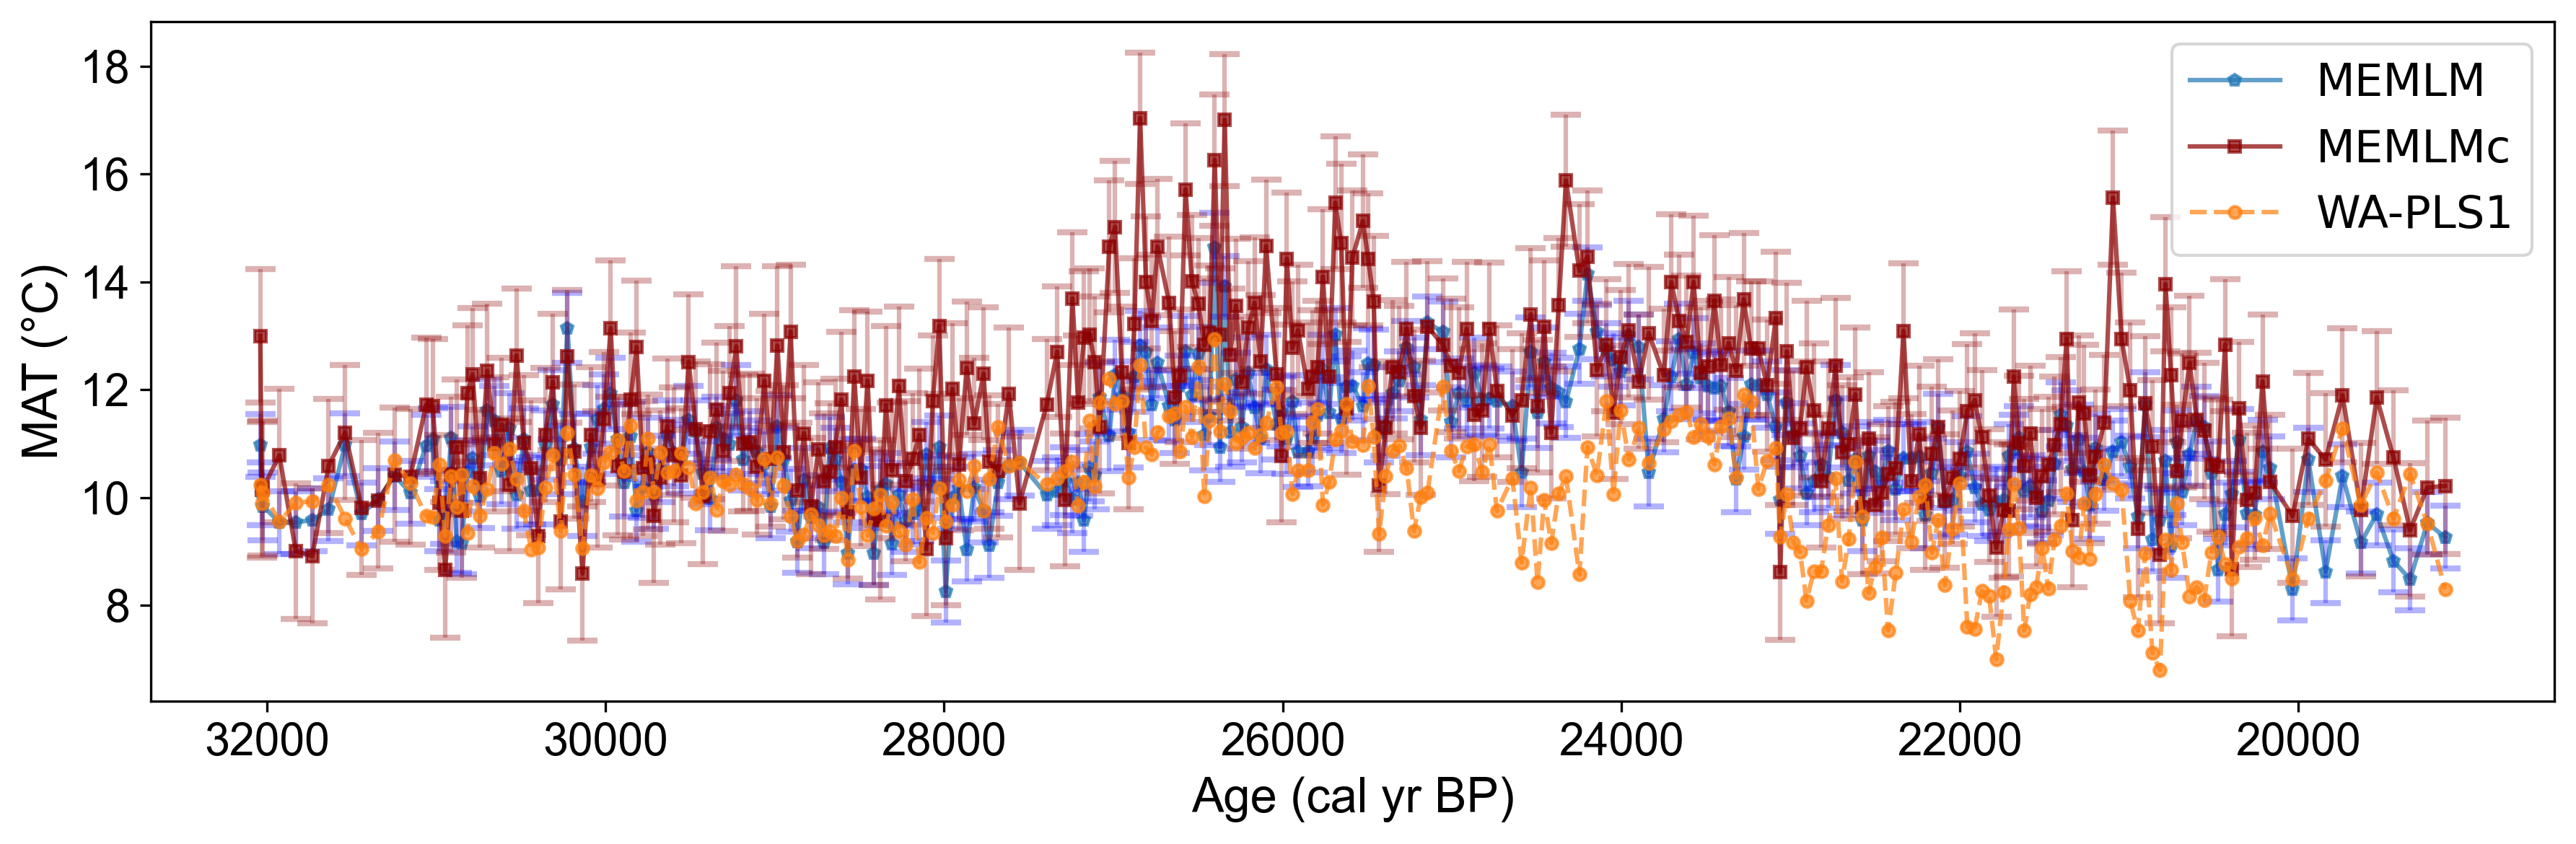

In [12]:
#Llaviucu 
com_num = 4
plt_line = (pd.read_csv(dirtxt2[1],index_col = 0).dropna(axis = 0))
plt_line.index = plt_line.index-30000

wapls_best = select_the_best('validation/WAPLS_pHcv.csv',1)
plt.figure(figsize=(12,4),dpi = 300)
plt_line.index = 1980-plt_line.index
plt_line.iloc[:,[(5+wapls_best[-1])]] = plt_line.iloc[:,[(5+wapls_best[-1])]]/10

plt_line = plt_line.iloc[:,[0,1,2,3,4,(5+wapls_best[-1]),-6,-5,-4,-3,-2,-1]]
plt_line.columns = [*plt_line.columns[:-1],'WAPLS_'+str(wapls_best[-1]+1)]
plt.plot(plt_line.iloc[:,0],'-p',markersize = 4,alpha = 0.7)
#plt.plot(plt_line.iloc[:,-6],'-p',markersize = 4,alpha = 0.3)
#plt.plot(plt_line.iloc[:,-5],'-p',markersize = 4,alpha = 0.3)
#plt.plot(plt_line.iloc[:,1],'-p',markersize = 4,alpha = 0.7)
plt.errorbar(plt_line.index, plt_line.iloc[:,0], yerr=plt_line.iloc[:,-6]-plt_line.iloc[:,0], alpha = 0.3,fmt='None', color='blue', capsize=5, capthick=2)
plt.plot(plt_line.iloc[:,2],'-s',markersize = 4,alpha = 0.7,color = 'darkred')
#plt.plot(plt_line.iloc[:,-4],'-s',markersize = 4,alpha = 0.3,color = 'darkred')
#plt.plot(plt_line.iloc[:,-3],'-s',markersize = 4,alpha = 0.3,color = 'darkred')
plt.errorbar(plt_line.index, plt_line.iloc[:,2], yerr=plt_line.iloc[:,-2]-plt_line.iloc[:,2], alpha = 0.3,fmt='None', color = 'darkred',capsize=5, capthick=2)

#plt.plot(plt_line.iloc[:,3],'-s',markersize = 4, linestyle='--',alpha = 1) #'s',
#plt.plot(plt_line.iloc[:,4],'-s',markersize = 4, linestyle='--',alpha = 0.7) # 's',
plt.plot(plt_line.iloc[:,5],'-o',markersize = 4, linestyle='--',alpha = 0.7) # 's',
#plt.plot(plt_line.iloc[:,-2],'-o',markersize = 4, linestyle='--',alpha = 0.3) # 's',
#plt.plot(plt_line.iloc[:,-1],'-o',markersize = 4, linestyle='--',alpha = 0.3) # 's',
#plt.errorbar(plt_line.index, plt_line.iloc[:,5], yerr=plt_line.iloc[:,-2]-plt_line.iloc[:,5], fmt='None', color='black', capsize=5, capthick=2)

led_names = ['MEMLM','MEMLMe','MEMLMc','WAPLS (best)']
led_names = ['MEMLM','MEMLMc','WA-PLS1']

plt.gca().invert_xaxis()
#'-o', '-s', '-^',  '-p',
#'-o', '-s', '-^',  '-p',
plt.legend(led_names, loc = 'upper right', fontsize="15")
plt.ylabel('MAT (°C)', fontdict={'family' : 'Arial', 'size'   : 16})
plt.xlabel('Age (cal yr BP)', fontdict={'family' : 'Arial', 'size'   : 16})
plt.yticks(fontproperties = 'Arial', size = 15)
plt.xticks(fontproperties = 'Arial', size = 15)
#marker
plt.tight_layout()

#plt.savefig('lla_256_2107.png',dpi = 300)
plt.show()
#plt.legend(['MSE_train','MSE_val'])

results2007 - Copy - Copy/lla.csv
[[-0.0264122   0.04724833  0.03961432  0.05824417]]
0
Comp02


C:\Users\cml\AppData\Local\Temp\ipykernel_25036\2732615972.py:25: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(plt_line.iloc[:,5],'-o',markersize = 4, linestyle='--',alpha = 0.7) # 's',


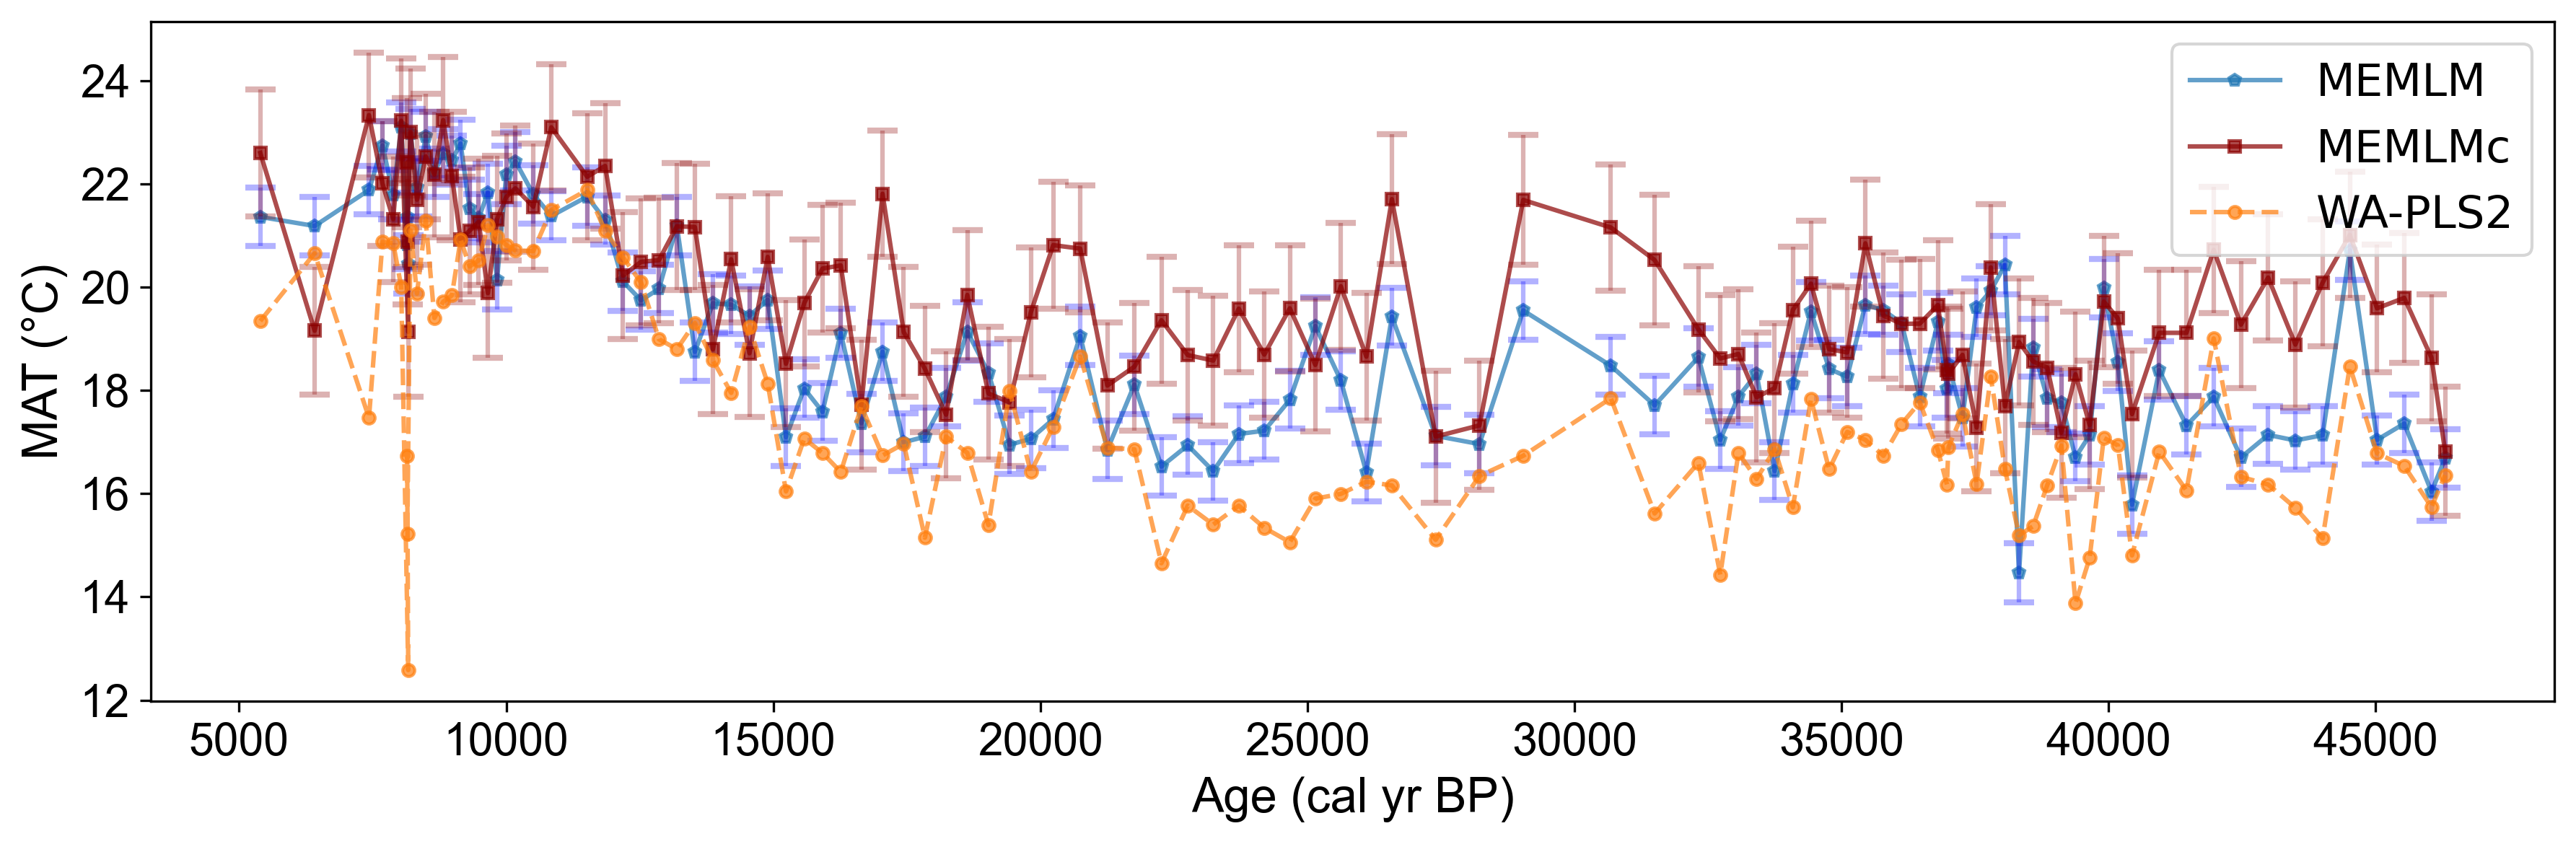

In [11]:
#Consuelo 
com_num = 4
plt_line = (pd.read_csv(dirtxt2[0],index_col = 0).dropna(axis = 0))
plt_line.index = plt_line.index

wapls_best = select_the_best('validation/WAPLS_pHcv.csv',1)
plt.figure(figsize=(12,4),dpi = 300)
#plt_line.index = 1980-plt_line.index
plt_line.iloc[:,[(5+wapls_best[-1])]] = plt_line.iloc[:,[(5+wapls_best[-1])]]/10

plt_line = plt_line.iloc[:,[0,1,2,3,4,(5+wapls_best[-1]),-6,-5,-4,-3,-2,-1]]
plt_line.columns = [*plt_line.columns[:-1],'WAPLS_'+str(wapls_best[-1]+1)]
plt.plot(plt_line.iloc[:,0],'-p',markersize = 4,alpha = 0.7)
#plt.plot(plt_line.iloc[:,-6],'-p',markersize = 4,alpha = 0.3)
#plt.plot(plt_line.iloc[:,-5],'-p',markersize = 4,alpha = 0.3)
#plt.plot(plt_line.iloc[:,1],'-p',markersize = 4,alpha = 0.7)
plt.errorbar(plt_line.index, plt_line.iloc[:,0], yerr=plt_line.iloc[:,-6]-plt_line.iloc[:,0], alpha = 0.3,fmt='None', color='blue', capsize=5, capthick=2)
plt.plot(plt_line.iloc[:,2],'-s',markersize = 4,alpha = 0.7,color = 'darkred')
#plt.plot(plt_line.iloc[:,-4],'-s',markersize = 4,alpha = 0.3,color = 'darkred')
#plt.plot(plt_line.iloc[:,-3],'-s',markersize = 4,alpha = 0.3,color = 'darkred')
plt.errorbar(plt_line.index, plt_line.iloc[:,2], yerr=plt_line.iloc[:,-2]-plt_line.iloc[:,2], alpha = 0.3,fmt='None', color = 'darkred',capsize=5, capthick=2)

#plt.plot(plt_line.iloc[:,3],'-s',markersize = 4, linestyle='--',alpha = 1) #'s',
#plt.plot(plt_line.iloc[:,4],'-s',markersize = 4, linestyle='--',alpha = 0.7) # 's',
plt.plot(plt_line.iloc[:,5],'-o',markersize = 4, linestyle='--',alpha = 0.7) # 's',
#plt.plot(plt_line.iloc[:,-2],'-o',markersize = 4, linestyle='--',alpha = 0.3) # 's',
#plt.plot(plt_line.iloc[:,-1],'-o',markersize = 4, linestyle='--',alpha = 0.3) # 's',
#plt.errorbar(plt_line.index, plt_line.iloc[:,5], yerr=plt_line.iloc[:,-2]-plt_line.iloc[:,5], fmt='None', color='black', capsize=5, capthick=2)

led_names = ['MEMLM','MEMLMc','WA-PLS2']
#plt.gca().invert_xaxis()

#'-o', '-s', '-^',  '-p',
plt.legend(led_names, loc = 'upper right', fontsize="15")
plt.ylabel('MAT (°C)', fontdict={'family' : 'Arial', 'size'   : 16})
plt.xlabel('Age (cal yr BP)', fontdict={'family' : 'Arial', 'size'   : 16})
plt.yticks(fontproperties = 'Arial', size = 15)
plt.xticks(fontproperties = 'Arial', size = 15)
#marker
plt.tight_layout()
#plt.savefig('consielo_256_2107.png',dpi = 300)
plt.show()
#plt.legend(['MSE_train','MSE_val'])

[[-0.06425237 -0.0220237  -0.00259694  0.00713269]]
1
Comp02


C:\Users\cml\AppData\Local\Temp\ipykernel_25036\3017008624.py:22: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(plt_line.iloc[:,5],'-o',markersize = 4, linestyle='--',alpha = 0.7) # 's',


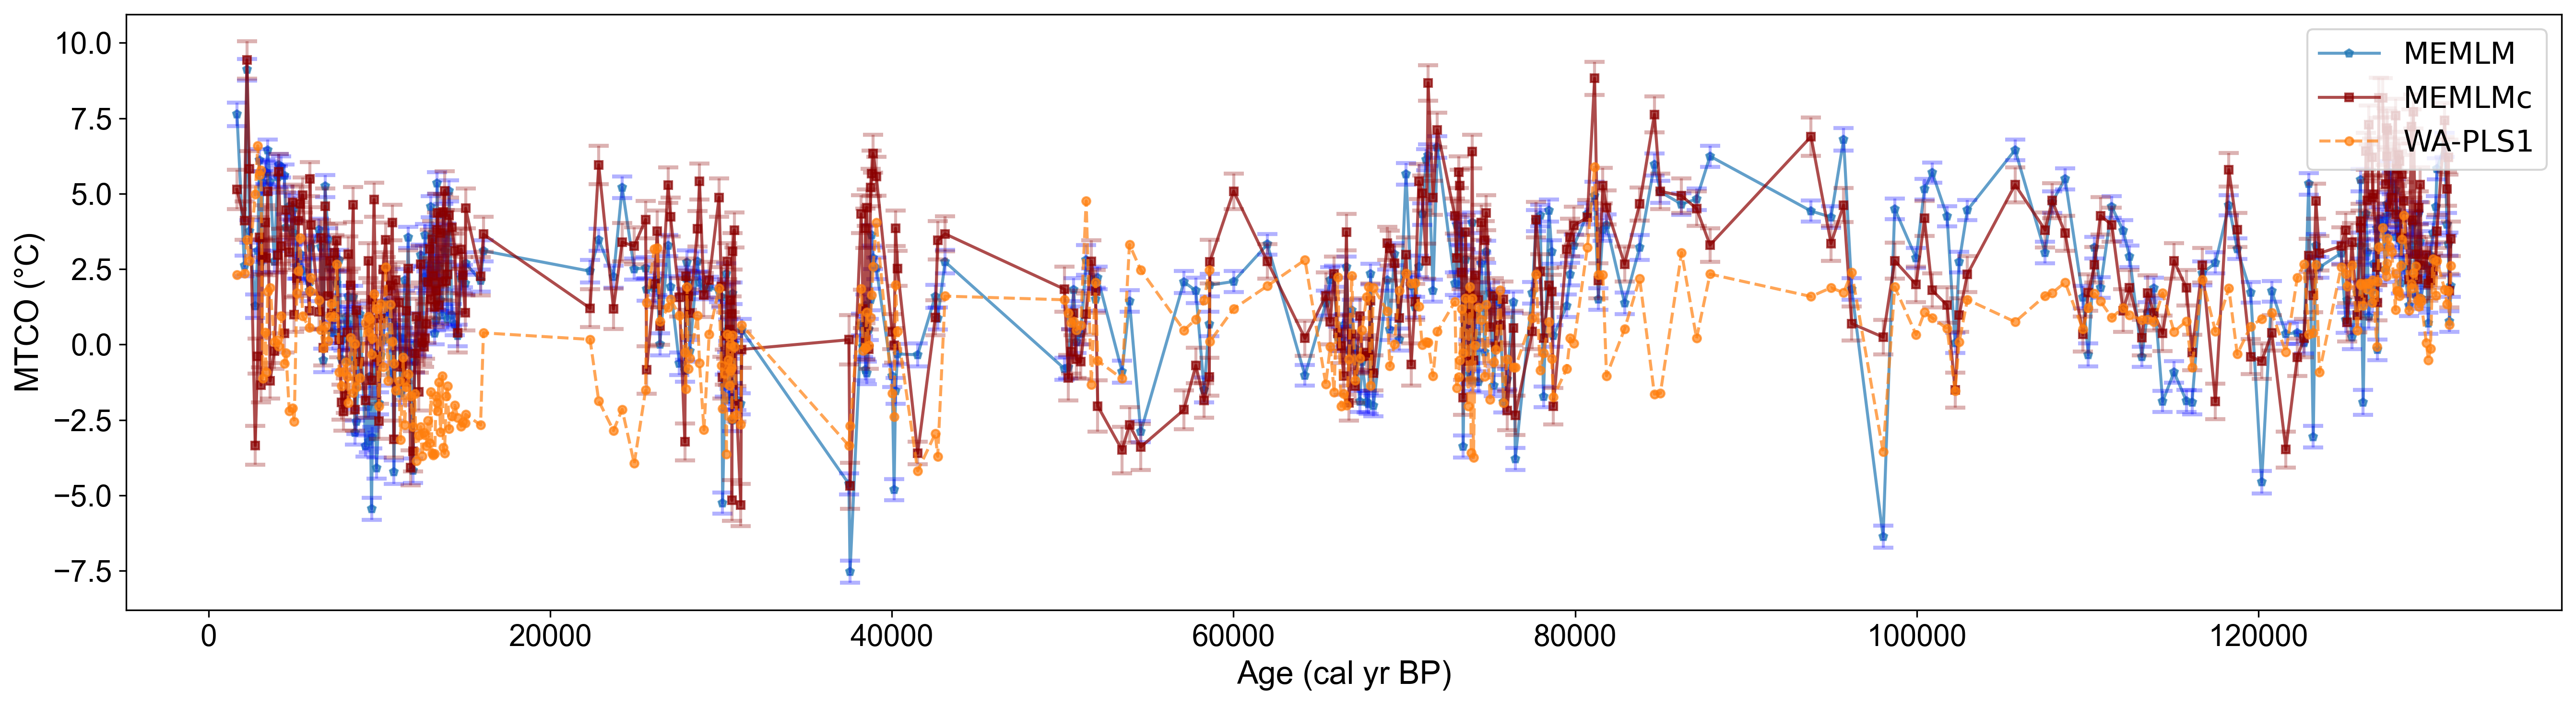

In [13]:
#Villarquemado 
com_num = 4
plt_line = (pd.read_csv(dirtxt2[-1],index_col = 0).dropna(axis = 0))
#plt_line.index = plt_line.index-30000

wapls_best = select_the_best('validation - Copy/WAPLS_MTCO_cv.csv')
plt.figure(figsize=(18,5),dpi = 300)
plt_line = plt_line.iloc[:,[0,1,2,3,4,(5+wapls_best[-1]),-6,-5,-4,-3,-2,-1]]
plt_line.rename(columns={plt_line.columns[5]: 'WAPLS_'+str(wapls_best[-1]+1)}, inplace=True)

plt.plot(plt_line.iloc[:,0],'-p',markersize = 4,alpha = 0.7)
#plt.plot(plt_line.iloc[:,-6],'-p',markersize = 4,alpha = 0.3)
#plt.plot(plt_line.iloc[:,-5],'-p',markersize = 4,alpha = 0.3)
#plt.plot(plt_line.iloc[:,1],'-p',markersize = 4,alpha = 0.7)
plt.errorbar(plt_line.index, plt_line.iloc[:,0], yerr=plt_line.iloc[:,-5]-plt_line.iloc[:,0], alpha = 0.3,fmt='None', color='blue', capsize=5, capthick=2)
plt.plot(plt_line.iloc[:,2],'-s',markersize = 4,alpha = 0.7,color = 'darkred')
#plt.plot(plt_line.iloc[:,-4],'-s',markersize = 4,alpha = 0.3,color = 'darkred')
#plt.plot(plt_line.iloc[:,-3],'-s',markersize = 4,alpha = 0.3,color = 'darkred')
plt.errorbar(plt_line.index, plt_line.iloc[:,2], yerr=plt_line.iloc[:,-2]-plt_line.iloc[:,2], alpha = 0.3,fmt='None', color = 'darkred',capsize=5, capthick=2)

#plt.plot(plt_line.iloc[:,3],'-s',markersize = 4, linestyle='--',alpha = 1) #'s',
#plt.plot(plt_line.iloc[:,4],'-s',markersize = 4, linestyle='--',alpha = 0.7) # 's',
plt.plot(plt_line.iloc[:,5],'-o',markersize = 4, linestyle='--',alpha = 0.7) # 's',
#plt.plot(plt_line.iloc[:,-2],'-o',markersize = 4, linestyle='--',alpha = 0.3) # 's',
#plt.plot(plt_line.iloc[:,-1],'-o',markersize = 4, linestyle='--',alpha = 0.3) # 's',
#plt.errorbar(plt_line.index, plt_line.iloc[:,5], yerr=plt_line.iloc[:,-2]-plt_line.iloc[:,5], fmt='None', color='black', capsize=5, capthick=2)

led_names = ['MEMLM','MEMLMe','MEMLMc','WAPLS (best)']
led_names = ['MEMLM','MEMLMc','WA-PLS1']

#'-o', '-s', '-^',  '-p',
plt.legend(led_names, loc = 'upper right', fontsize="15")
plt.ylabel('MTCO (°C)', fontdict={'family' : 'Arial', 'size'   : 16})
plt.xlabel('Age (cal yr BP)', fontdict={'family' : 'Arial', 'size'   : 16})
plt.yticks(fontproperties = 'Arial', size = 15)
plt.xticks(fontproperties = 'Arial', size = 15)
#marker
plt.tight_layout()

#plt.savefig('rlgh3_2107.png',dpi = 300)
plt.show()
#plt.legend(['MSE_train','MSE_val'])

In [16]:
jpg_dir1 = 'vali2007 - Copy - Copy/'     ## BASED ON THE VALIDATION DATA        
for i in glob.glob(jpg_dir1+ r'/*.csv'):  
    print(str(i).replace("\\", "/"))
    dirtxt_val.append(str(i).replace("\\", "/"))

In [30]:
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

# ... (previous code remains unchanged)


import glob
dirtxt_val = []
jpg_dir1 = 'vali2007 - Copy/'     #D:/MEE_plot/plot5 - 副本/                 
for i in glob.glob(jpg_dir1+ r'/*.csv'):  
    print(str(i).replace("\\", "/"))
    dirtxt_val.append(str(i).replace("\\", "/"))
    
def make_pair(addrs,label_name,sub_num = 6,figsize=(20, 3),S=False,x_title = False):
    print(S)
    import warnings
    warnings.filterwarnings("ignore")
    

    C = plt.figure(figsize=figsize, dpi = 300)
    if x_title:
        C.text(0.5, -0.10, 'Predicted values', va='center', ha='center', fontsize=18)
    col_list = []
    i_index = -1
    results = []
    val_csv = pd.read_csv(addrs,index_col = 0)
    val_csv.columns = ['MEMLM','MEMLMe','MEMLMc', 'WA-Inv', 'WA-Cla', 'WAPLS.Comp01',
       'WAPLS.Comp02', 'WAPLS.Comp03', 'WAPLS.Comp04', 'WAPLS.Comp05', 'y_a', 'y_e', 'y_ea', 'y_wa',
       'y_wapls']
    if S:
        val_csv.iloc[:,3:] = val_csv.iloc[:,3:]/10
    columns_list = []
    for ii in range(6):
        columns_list.append(val_csv.columns[ii])
        if ii <3:
            y_i = -3
            col_list.append(val_csv.iloc[:,[ii,-3+(-2+ii)]])
        elif ii <5:
            col_list.append(val_csv.iloc[:,[ii,-2]])
        else:
            wapls_best = select_the_best(val_csv.iloc[:,[5,6,7,8,9,-1]])[-1]
            val_csv.rename(columns={val_csv.columns[ii+wapls_best]: 'WA-PLS (best)'}, inplace=True)
            col_list.append(val_csv.iloc[:,[ii+wapls_best,-1]])
            #columns_list[-1] = 'WA-PLS_%s'%(wapls_best+1)
            columns_list[-1] = 'WA-PLS'
    for i,sub_v in enumerate(col_list):

        #sub_v = _.iloc[:,[i,-1]]
        sub_v = sub_v[sub_v.iloc[:,0]!=0]
        sub_v = sub_v[sub_v.iloc[:,1]!=0]
        tick_max = np.max([*sub_v.iloc[:,0].values,*sub_v.iloc[:,1].values])
        tick_min = np.min([*sub_v.iloc[:,0].values,*sub_v.iloc[:,1].values])
        i_index +=1
        plt.subplot(1,sub_num,1+i_index)
        ptt=sub_v.iloc[:,0].values  ## func
        ytt=sub_v.iloc[:,1].values  ## rate
        regression_slope, intercept, r_value, p_value, std_err = linregress(sub_v.iloc[:, 0], sub_v.iloc[:, 1])

        # ... (remaining code remains unchanged)

        # Add the regression slope to the results
        results.append([sub_v.columns[0], regression_slope, (r2_score(ytt, ptt)), np.sqrt(mean_squared_error(ytt, ptt))])

        #results.append([sub_v.columns[0],(r2_score(ytt,ptt)),np.sqrt(mean_squared_error(ptt,ytt))])
        sns.regplot(x=np.array(ptt),y= np.array(ytt),scatter_kws={'alpha':0.5,'color': 'darkred'},line_kws={'alpha':0.8,'color':'mediumvioletred'})  #, color='b',alpha = 1
        plt.xlim(tick_min,tick_max)
        plt.ylim(tick_min,tick_max)
        plt.xlabel(sub_v.columns[0],fontsize = 15)
        plt.yticks(fontproperties = 'Arial', size = 10)
        plt.xticks(fontproperties = 'Arial', size =10)
        if i == 0:
            #plt.ylabel(label_name)
            plt.ylabel('Real %s'%label_name,fontsize = 15) 
        #plt.annotate("R2 : %.3f"%r2_score(ptt, ytt), xy=[(tick_max-tick_min)/tick_min*0.60,(tick_max-tick_min)/tick_min*0.15],fontsize = 12) #r2_score(pred_i, test_i)
    #print(i_index)
    #print(re_b.shape[1]-1)
        #set(xlim=(4.5,7.5),ylim=(4.5,7.5))
    
    #plt.title()
    results = pd.DataFrame(results)
    results.columns = ['model', 'regression_slope', 'r2', 'rmse']

    results.set_index(['model'],inplace = True)

    #plt.savefig('vali_%s_256.png'%addrs.split('/')[-1].split('.')[0],dpi = 300)
    plt.show()
    print(results.T)
    return(results.T)

vali2007 - Copy - Copy/lla.csv
True
[[-0.08868441  0.03735183  0.04922106  0.05817615]]
1
WAPLS.Comp02


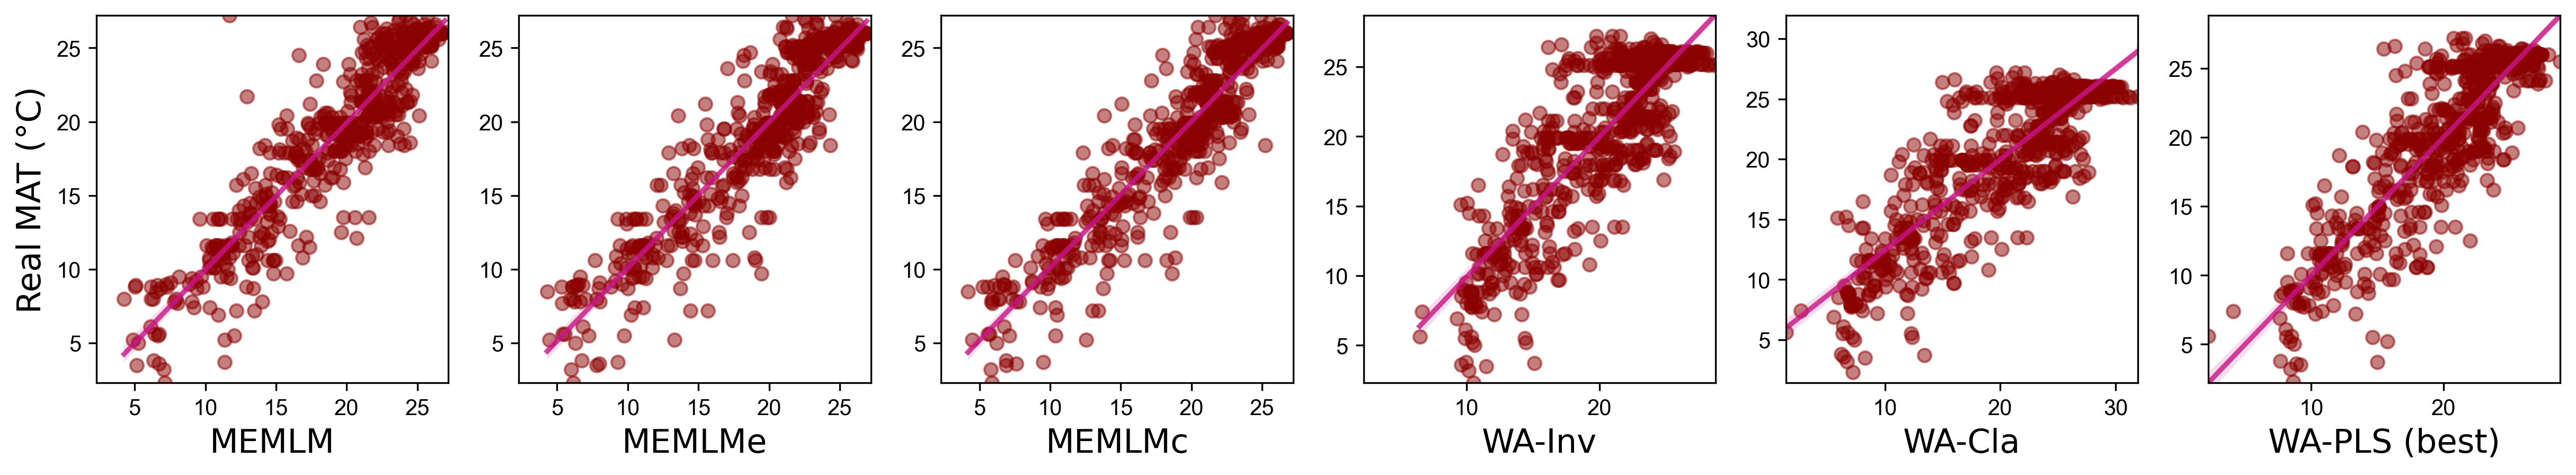

model                MEMLM    MEMLMe    MEMLMc    WA-Inv    WA-Cla  \
regression_slope  0.995434  0.989631  0.989480  1.009403  0.753465   
r2                0.861225  0.864513  0.877943  0.710585  0.636861   
rmse              2.211459  2.185100  2.073980  3.193617  3.577331   

model             WA-PLS (best)  
regression_slope       0.999619  
r2                     0.759116  
rmse                   2.913575  
vali2007 - Copy - Copy/RLGH.csv
False
[[-0.0264122   0.04724833  0.03961432  0.05824417]]
0
WAPLS.Comp01


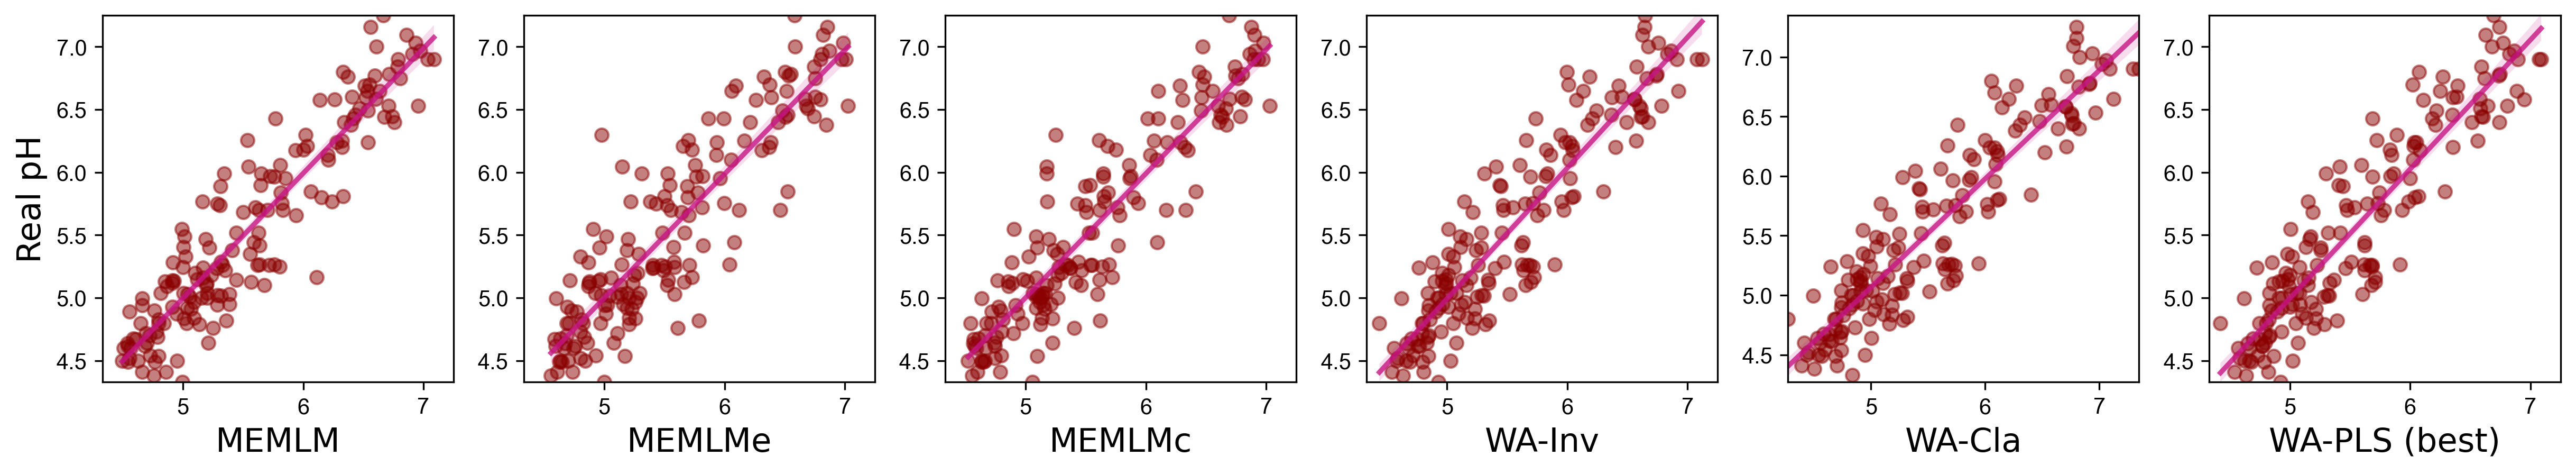

model                MEMLM    MEMLMe    MEMLMc    WA-Inv    WA-Cla  \
regression_slope  0.995110  0.987059  0.988241  1.041465  0.910491   
r2                0.856383  0.797560  0.841410  0.840826  0.834059   
rmse              0.291613  0.346219  0.306437  0.307000  0.313458   

model             WA-PLS (best)  
regression_slope       1.028765  
r2                     0.841180  
rmse                   0.306659  
vali2007 - Copy - Copy/vill.csv
False
[[-0.06425237 -0.0220237  -0.00259694  0.00713269]]
1
WAPLS.Comp02


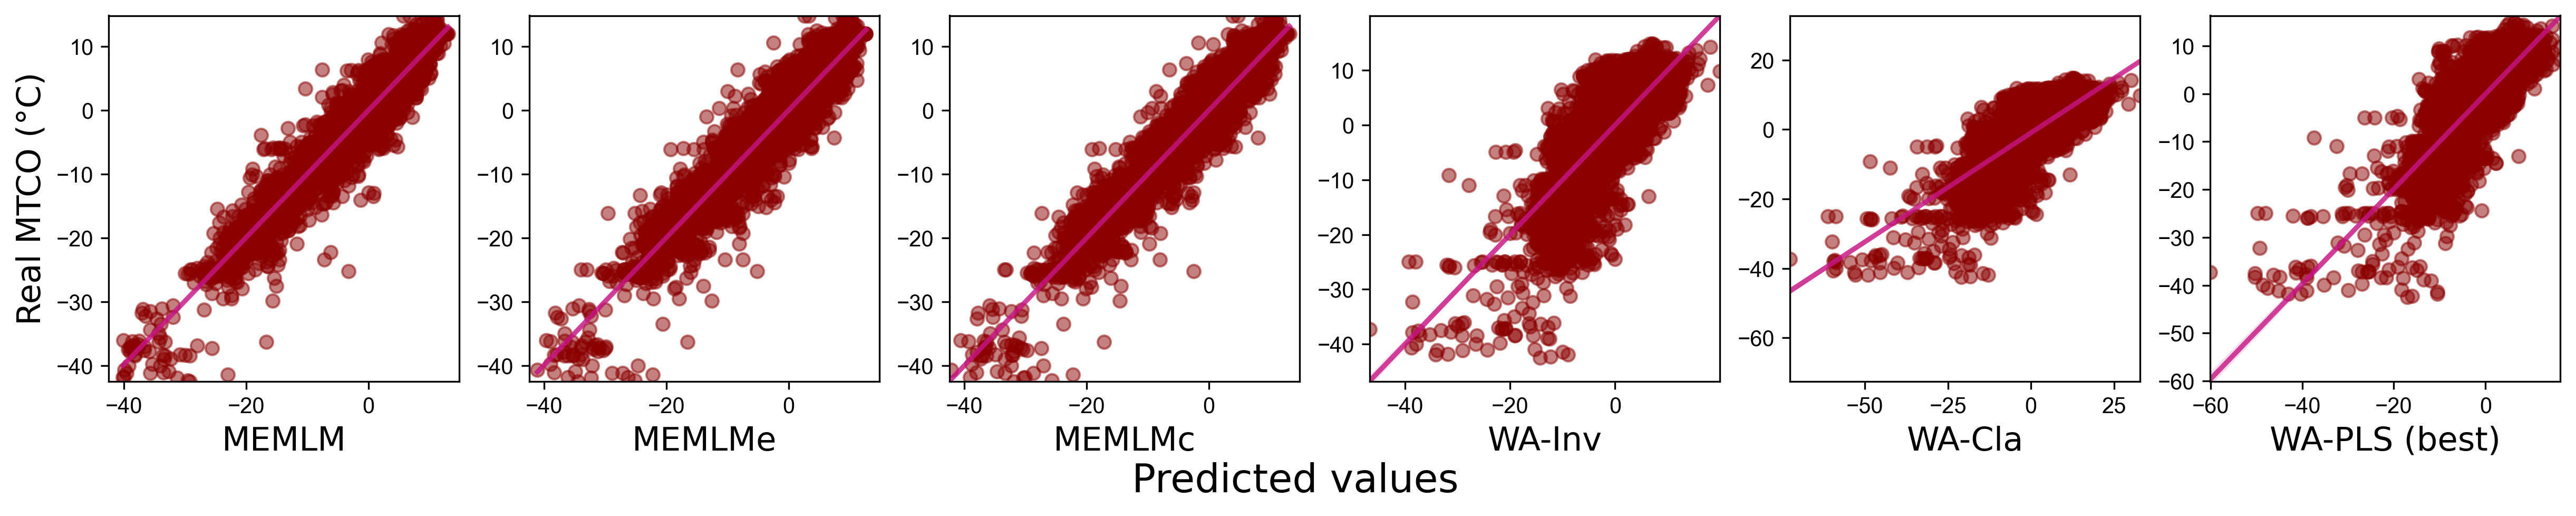

model                MEMLM    MEMLMe    MEMLMc    WA-Inv    WA-Cla  \
regression_slope  0.995885  0.997887  0.999855  0.999392  0.628737   
r2                0.925734  0.897388  0.916809  0.623511  0.406247   
rmse              2.360486  2.774622  2.498289  5.314730  6.674339   

model             WA-PLS (best)  
regression_slope       0.993230  
r2                     0.671624  
rmse                   4.963534  


In [31]:
S = False
should_use = False
for i_index,i in enumerate(dirtxt_val):  
    print(i)
    if i_index == 0:
        S=True
    else:
        S = False
    if i_index ==2:
        should_use = True
    make_pair(i,['MAT (°C)','pH','MTCO (°C)'][i_index],S=S,x_title = should_use)
